In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
google = pd.read_csv("data/googleplaystore.csv")

In [60]:
google.Category.value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [9]:
google_review = pd.read_csv("data/googleplaystore_user_reviews.csv")

In [10]:
google_review.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [11]:
google_review = google_review[google_review.Translated_Review.notna()]

In [13]:
np.shape(google_review.App.unique())

(865,)

In [59]:
np.shape(google.App.unique())

(9660,)

In [57]:
google.App.value_counts().head(60)

ROBLOX                                                9
8 Ball Pool                                           7
Zombie Catchers                                       6
Bubble Shooter                                        6
Helix Jump                                            6
slither.io                                            5
Subway Surfers                                        5
Candy Crush Saga                                      5
Granny                                                5
Farm Heroes Saga                                      5
Zombie Tsunami                                        5
Angry Birds Classic                                   5
Temple Run 2                                          5
Duolingo: Learn Languages Free                        5
Bowmasters                                            5
Hill Climb Racing                                     4
Sniper 3D Gun Shooter: Free Shooting Games - FPS      4
My Talking Angela                               

In [40]:
google.drop_duplicates(inplace = True)

In [42]:
google[google["App"] == "ROBLOX"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [41]:
google.App.value_counts().head(5)

ROBLOX             9
8 Ball Pool        7
Zombie Catchers    6
Bubble Shooter     6
Helix Jump         6
Name: App, dtype: int64

In [19]:
google.Rating.describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [31]:
google.loc[google.Type =="0" ,"Type"] = "Free"
paid_free = google.Type.value_counts()
paid_free

Free    10040
Paid      800
Name: Type, dtype: int64

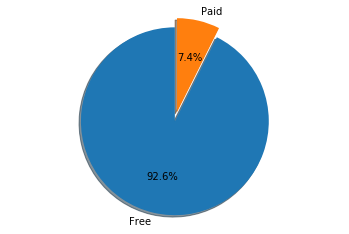

In [32]:
fig, ax = plt.subplots()
ax.pie(google.Type.value_counts(), explode=(0, 0.1), labels=google.Type.value_counts().index.tolist(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [132]:
from bs4 import BeautifulSoup
soup = BeautifulSoup("http", 'html.parser')
URL = 'https://www.androidrank.org/android-most-popular-google-play-apps'
r = requests.get(URL)
page_body = r.text
soup = BeautifulSoup(page_body, 'html.parser')
table = soup.find("table", id="ranklist")
apps = table.find_all("tr")[1:]

In [137]:
nav = soup.find("nav")
start = nav.find("small", text="applications")
for b in start.find_next_siblings("b"):

In [142]:
start = nav.find("small", text="applications")

In [145]:
b

<b><a href="/android-most-popular-google-play-apps?category="></a></b>

In [162]:
from bs4 import BeautifulSoup
soup = BeautifulSoup("http", 'html.parser')
URL = 'https://www.androidrank.org/android-most-popular-google-play-apps'
r = requests.get(URL)
page_body = r.text
soup = BeautifulSoup(page_body, 'html.parser')
# Initialization
new_columns = ["URL", 'Rank','Name', 'Nb_Rating', 'Installs', 'Avg_Rating', "Ev_30", "Ev_60", "Price", "Category"]

app_pd = pd.DataFrame(columns=new_columns)
nav = soup.find("nav")
start = nav.find("small", text="applications")
for b in start.find_next_siblings("b"):
    a = b.find("a")
    Category = a.get_text()
    URL = 'https://www.androidrank.org/'+a["href"]
    r = requests.get(URL)
    page_body = r.text
    soup = BeautifulSoup(page_body, 'html.parser')
    table = soup.find("table", id="ranklist")
    apps = table.find_all("tr")[1:]
    for app in apps:
        URL, Rank, Name, Nb_Rating, Installs, Avg_Rating, Ev_30, Ev_60, Price = '','','','','','','','',''
        p = app.find_all("td")
        Rank = p[0].text
        URL = p[1].find('a', href=True)["href"]
        Name = p[1].find('a', href=True).text
        Nb_Rating = p[3].text
        Installs = p[4].text
        Avg_Rating = p[5].text
        Ev_30 = p[6].text
        Ev_60 = p[7].text
        Price = p[8].text
        characteristics_pd = pd.DataFrame([[URL, Rank, Name, Nb_Rating, Installs, Avg_Rating,
                                            Ev_30, Ev_60, Price,Category]], columns = new_columns)
        app_pd = app_pd.append(characteristics_pd,ignore_index=True)
    nextpage = soup.find_all('small')[1].find("a", text="Next >")
    while(len(nextpage['href'])):
        urlnext_page = "https://www.androidrank.org" + nextpage['href']
        r = requests.get(urlnext_page)
        page_body = r.text
        soup = BeautifulSoup(page_body, 'html.parser')

        table = soup.find("table", id="ranklist")
        apps = table.find_all("tr")[1:]


        for app in apps:
            URL, Rank, Name, Nb_Rating, Installs, Avg_Rating, Ev_30, Ev_60, Price = '','','','','','','','',''
            p = app.find_all("td")
            Rank = p[0].text
            URL = p[1].find('a', href=True)["href"]
            Name = p[1].find('a', href=True).text
            Nb_Rating = p[3].text
            Installs = p[4].text
            Avg_Rating = p[5].text
            Ev_30 = p[6].text
            Ev_60 = p[7].text
            Price = p[8].text
            characteristics_pd = pd.DataFrame([[URL, Rank, Name, Nb_Rating, Installs, Avg_Rating,
                                                Ev_30, Ev_60, Price, Category]], columns = new_columns)
            app_pd = app_pd.append(characteristics_pd,ignore_index=True)
            if(soup.find_all('small')[1].find("a", text="Next >")):
                nextpage = soup.find_all('small')[1].find("a", text="Next >")
            else:
                nextpage["href"] = ""

AttributeError: 'NoneType' object has no attribute 'find_all'

In [161]:
app_pd

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category
0,/application/canva_graphic_design_video_invite...,1.,"Canva: Graphic Design, Video, Invite & Logo Maker","2,241,579",50.0 M,4.68,4.7%,8.8%,Free,Art & Design
1,/application/ibis_paint_x/jp.ne.ibis.ibispaint...,2.,ibis Paint X,"642,389",10.0 M,4.45,4.4%,9.0%,Free,Art & Design
2,/application/kappboom_cool_wallpapers_backgrou...,3.,Kappboom - Cool Wallpapers & Background Wallpa...,"399,327",10.0 M,4.63,0.0%,0.0%,Free,Art & Design
3,/application/flipaclip_cartoon_animation/com.v...,4.,FlipaClip: Cartoon animation,"319,841",10.0 M,4.28,1.5%,3.2%,Free,Art & Design
4,/application/u_launcher_lite_new_3d_launcher_2...,5.,"U Launcher Lite-New 3D Launcher 2019, Hide apps","216,161",10.0 M,4.52,1.6%,3.4%,Free,Art & Design
5,/application/medibang_paint_make_art_/com.medi...,6.,MediBang Paint - Make Art !,"194,262",10.0 M,4.10,1.2%,2.5%,Free,Art & Design
6,/application/u_launcher_3d_new_launcher_2019_3...,7.,"U Launcher 3D: New Launcher 2019, 3d themes","130,195",5.0 M,4.50,1.1%,2.0%,Free,Art & Design
7,/application/papercolor/com.eyewind.paperone,8.,PaperColor,"111,058",10.0 M,4.23,1.9%,4.2%,Free,Art & Design
8,/application/sand_draw_sketch_drawing_pad_crea...,9.,Sand Draw Sketch Drawing Pad: Creative Doodle Art,"99,055",5.0 M,4.37,0.9%,1.9%,Free,Art & Design
9,/application/how_to_draw_graffitis/com.sweefit...,10.,How to Draw Graffitis,"94,175",5.0 M,4.33,0.2%,0.4%,Free,Art & Design


In [96]:
import requests
website = "https://www.androidrank.org/api/application/"
app = "com.facebook.katana"
key = "60lnc52x178li1rocmpum3829kdf6d9wt3dp7lqg7vxmqat6ov9ekcoipmqyuzpa"
search = website+app+"?key="+key;
response = requests.get(search)

In [25]:
response.json()

{'category': 'Social',
 'category_rank': {'current': []},
 'developer': {'developer_id': 'Facebook', 'name': 'Facebook'},
 'id': 'com.facebook.katana',
 'images': {'logo': 'https://lh3.googleusercontent.com/ccWDU4A7fX1R24v-vvT480ySh26AYp97g1VrIB_FIdjRcuQB2JP2WdY7h_wVVAeSpg',
  'screenshots': ['https://lh3.googleusercontent.com/JelCBr0rDjDEGOqYb4m2Z7OSVBxS5KyqO94eW5TGnQtHc9k08uaMZVTz6s_rKha31eE',
   'https://lh3.googleusercontent.com/Iomoub5EHkAk1_bKqIyjkFbKQ4vw-zFfTqfUMG_da-4-hV_tXwvuiFQUQWIeol_fRSo',
   'https://lh3.googleusercontent.com/Jx0nPnGaGNRXCHlmGv13gDsIzhLykgkza5y2SUNruZoiwcik5lQ-gj99vdHZA0Zlbtrz',
   'https://lh3.googleusercontent.com/YBTVMqZcl-t16dnH7_DxHsMm7WU2v2HdZRX3Q3UnYHXo8HUfQSuN2Ahn_M4KQunbeigu',
   'https://lh3.googleusercontent.com/o4enSNrWkR4F6wILxPk6-6XkNyea4j9tcn8gLPphbBvhpp4_HBU9NNuQnhzreYH5uSN0']},
 'installs': {'current': {'count': '5000000000'},
  'history': [{'count': 5000000000, 'date': '2019-10-16'},
   {'count': 1000000000, 'date': '2014-08-28'},
   {'co